

# Project 2: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 In this project, I have chosen the (TMDb movie data) due my passion always to watch movies. This data set contains information about 10,000 movies collected from The Movie Database (TMDb),I have seen that the data set has 21 columns named (id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,). It is obvious that most columns are string type(object in python) and 18066 rows. there is many missing values in the data, which can be handeled in the situation of int type by taking the mean for that coulmn and filling in the missing value. 
 
 ### Three question I would like to ask and answer them :
 
 First is Does people like to watch movies  ,explain your  answer ? 
 
 Secondly Name the five highest movies revenue and how can you describe the relationship between budget and revenue 'are the dependent' ?
 
 How come the runtime affect the popularity ? 






In [1]:
#import statements for all of the packages that you plan to use.

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

 



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load data and print out a few lines. 

df=pd.read_csv('tmdb-movies.csv') #load data 
df.head(3)                        #explore the first three rwos of data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.tail(5)                       #explore the last five rows of data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
#explore how many rows and columns in the data (rows,columns)
df.shape

(10866, 21)

In [5]:
df.info()                         #expolre columns and what is their datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#check for missing value by count the total rows in each column which contain null values ; homepage column is the most one that has null values 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df.describe()                     #explor statistical results about data like mean, standard diviation and so on 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
sum(df.duplicated())              #check if there is any dublicatin in data ; if so count them ..

1



# Data Cleaning (Replace this with more specific notes!)

   ### After investigation and expolring, here are the things we need to delete or modify:

1.Remove unnessasry columns that not needed in this analysis.

2.remove duplications of rows.

3.release date column data type is object (string), which need to be changed into datetime datatype.

4.Noticed that some movies have 0 values in revenue and budget , so remove them. 


In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#First, I have removed some columns in the dataframe that I dont need in this particuler analysis
df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'] ,axis=1,inplace=True)

In [10]:
#double check on data after deletion ..
df.shape

(10866, 15)

In [11]:
#check data head
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


In [12]:
#delete the duplication ..
df.drop_duplicates(inplace=True)
#check if the deletion successed ?
sum(df.duplicated())  


0

In [13]:
#double check on data
df.shape

(10865, 15)

In [14]:
#Now I want to convert relase data column type from object to date ..
df['release_date']=pd.to_datetime(df['release_date'])
#Check for data type ..
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 1.3+ MB


### In the next step, I have removed rows that contained revenue or budget with zero value because I considered them as missing value or movies that are not released yet.

In [15]:
#final step, delete movies that have 0 values in revenue 

df = df[df.revenue != 0]


In [16]:
##final step, delete movies that have 0 values in budget 
df = df[df.budget != 0]

In [17]:
#dubled check on data after deletion
df.shape

(3854, 15)

In [18]:
#check for 0 value in revenue column..
sum(df[df.revenue== 0].any(0))

0

In [19]:
#check for 0 value in budget column..
sum(df[df.budget== 0].any(0))

0

In [20]:
#see data head
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Does people like to watch movies  ,explain your  answer ? )       


In this question, I would like to explore the answer using varible popularity of movies, are they still trend along with time.  I have used the mean for popularity in each year using group by function to see how popularity is changed over yeare. then , plot it using line kind plot. lets see the visulaization .

In [21]:
#create a dataframe that apply the mean function grouped by release year 
popularty_mean=df.groupby('release_year').mean()['popularity']


In [22]:
#see the results ..
popularty_mean.head(3)

release_year
1960    1.324513
1961    0.787718
1962    0.983485
Name: popularity, dtype: float64

Text(0,0.5,'Average Popularity')

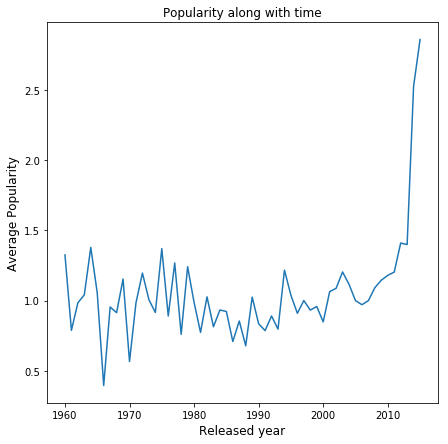

In [23]:
#plot the popularty_mean using plot function and specify the size and kind
popularty_mean.plot(x='release_year',y='popularty_mean',kind='line',figsize=(7,7))

#set title
plt.title("Popularity along with time",fontsize = 12)

#set the x-label and y-label for the plot.
plt.xlabel('Released year',fontsize = 12)
plt.ylabel('Average Popularity',fontsize = 12)


Text(0,0.5,'Number of relaesed movies')

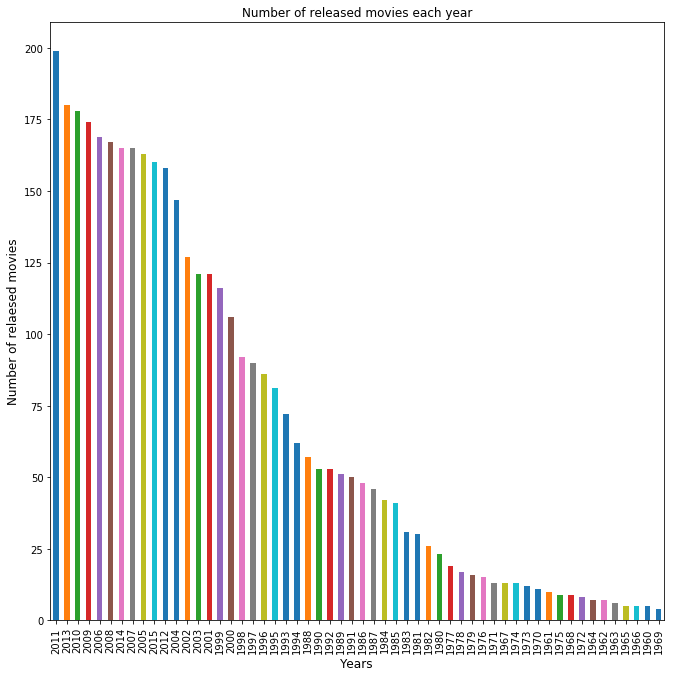

In [24]:
# also if we plot how many movies in each year as bar graph would give us same analysis
df['release_year'].value_counts().plot(kind='bar',figsize=(11,11))
#set title
plt.title("Number of released movies each year",fontsize = 12)

#set the x-label and y-label for the plot.
plt.xlabel('Years',fontsize = 12)
plt.ylabel('Number of relaesed movies',fontsize = 12)


### From the previous figures, it show that popularity is increasing over years and peak at the recent years in ascending way. the results is convincing due the easability of watching movies via different resourses like cinama , internet , smart phones or TV. Also the high teqniques that used in producing movies year after another  

### Research Question 2(Name the five highest movies revenue and how can you describe the relationship between budget and revenue 'are the dependent' ?)  
 in this question, we will first filter the dataframe to only the movies that are released recently by 2015 and save this to a new dataframe called df_recent. after that , among this new dataframe only choose the top five revenue using nlargest fumction. the highest one is  Jurassic World with revenue 	1513528810. In the second part of the question,a scatter plot is better describe the relationship between two variables (budget and revenue).lets see the visualization...
 


In [25]:
#see the dataframe
df.head(5)


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [26]:
#revenue_mean=df.groupby('release_year').mean()['revenue'] 
#vote_count_mean=df.groupby('release_year').mean()['vote_count'] 
#df.plot(x='revenue_mean',y='vote_count_mean',kind='line',figsize=(9,9))
df_Recent=df[df['release_year'] ==2015]
df_Recent.head(3)


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015


In [27]:
#use largest function for revenue column to find out the most five rows revenue..
df_10=df_Recent.nlargest(5,['revenue'])
#show the results which are Star Wars: The Force Awakens, Jurassic World, Furious 7, Avengers: Age of Ultron and  Minions.
df_10.head(5)


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,marvel comic|comic|sequel|superhero|vision,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015


Text(0.5,1,'revenue Vs budget Plot')

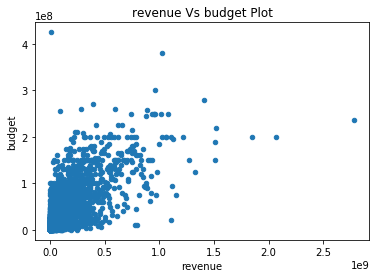

In [28]:
#plot the scatter relationship between the two coloumns budget and revenue
df.plot(x='revenue', y='budget',kind='scatter')
#set title
plt.title("revenue Vs budget Plot",fontsize = 12)



### from the previous figure, it seams that the Budget and revenue have positive relationship. Means that  movies with good budget result in better revenues. budget and revenue are dependent variables since one is affect another.

### Research Question 3  ( How come the runtime affect the popularity ? )
In this question, I do a group of the data according to their runtime and find the avrage popularity belong to this and then visulize it. 

Text(0,0.5,'Average Popularity')

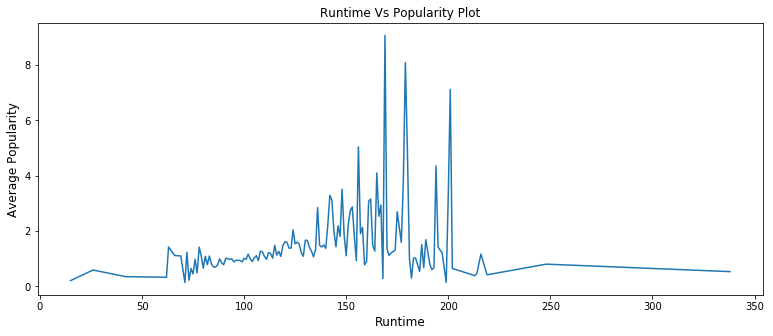

In [29]:
#make a group of data using run time and the related avrage popularity
df.groupby('runtime')['popularity'].mean().plot(figsize = (13,5))
#set title
plt.title("Runtime Vs Popularity Plot",fontsize = 12)

#set the x-label and y-label for the plot.
plt.xlabel('Runtime',fontsize = 12)
plt.ylabel('Average Popularity',fontsize = 12)

### from the previous figure, it is appear that people tend to watch movies between 150-200 and the popularity decreased as runtime increased. that is a fact because they feel boring and not excited if the movie take long time.

<a id='conclusions'></a>
##  Limitations

* Units of revenue and budget column are not specified , I am not sure if they are in US dollars or not?
* Also, the revenue or budget contains zero values, which it considered a missing value (unrepresented data) may be the reason why movies have not yet been released. Therefore, taking into account that the data of zero values will affect the final analysis especially that the total number of these rows is not small (data format after deletion from (10865, 15) to (3854, 15).
* Even that the adjusted data for revenue and budget are given,I have used the revenue and budget data to explore ,  I didn't use the adjusted one that only based on the year 2010.

## Conclusions

* Popularity of watching movies is increased notacibally.
* Number of released movies increased anually.
* Highest movie revenue is  Jurassic World with revenue 1513528810 in 2015.
* Budget and revenue have positive relationship.
* Movies with good budget result in better revenues.
* budget and revenue are dependent variables.
* People tend to watch movies between 150-200.
* popularity decreased as runtime increased.




In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0